<a href="https://colab.research.google.com/github/monte137/M2Analisis/blob/main/AnalisisSesgo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

drive.mount("/content/gdrive")  
!pwd

Mounted at /content/gdrive
/content


Se importan los datos a utilizar, y se les asignan nombres a cada una de las columnas. En este caso se utiliza un dataset de caracteristicas de vinos, donde apartir de estas, se clasifican en 3 diferentes clases.

In [88]:
%cd "/content/gdrive/MyDrive/ConcentracionCienciaDeDatos"
!ls
import pandas as pd
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt
columns= ["Class","Alcohol","Malic acid", "Ash","Alcalinity of ash", "Magnesium","Total phenols",
           "Flavanoids","Nonflavanoid phenols","Proanthocyanins","Color intensity","Hue",
           "OD280/OD315 of diluted wines","Proline"]
df= pd.read_csv('wine.data',names= columns,index_col=False)
df= df.sample(frac=1)
df.head()

/content/gdrive/MyDrive/ConcentracionCienciaDeDatos
adult.data	 iris.data   milknew.csv  Modulo3  Valhalla23.csv  wine.names
DatosTarea.xlsx  iris.names  Modulo2	  Reto1    wine.data


,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
18,1,14.19,1.59,2.48,16.5,108,3.30,3.93,0.32,1.86,8.70,1.23,2.82,1680
112,2,11.76,2.68,2.92,20.0,103,1.75,2.03,0.60,1.05,3.80,1.23,2.50,607
80,2,12.00,0.92,2.00,19.0,86,2.42,2.26,0.30,1.43,2.50,1.38,3.12,278
169,3,13.40,4.60,2.86,25.0,112,1.98,0.96,0.27,1.11,8.50,0.67,1.92,630
84,2,11.84,0.89,2.58,18.0,94,2.20,2.21,0.22,2.35,3.05,0.79,3.08,520


Se eliminan las clases OD280... y Proline del conjunto de datos. Y se separan los datos en x, & y, en este caso los valores objetivo o clase. Utilizando la funcion train test split, dividimos el data set en datos de entrenamiento y de test. 

In [104]:
df_x= df.drop(['Class',"Alcalinity of ash", "Magnesium","Total phenols",
           "Flavanoids","Nonflavanoid phenols","Proanthocyanins","Color intensity","Hue",
           "OD280/OD315 of diluted wines","Proline"],axis=1)
df_y= df['Class']
x_train=df_x.iloc[:107]
x_val= df_x.iloc[107:142]
x_test= df_x.iloc[142:]
y_train=df_y.iloc[:107]
y_val= df_y.iloc[107:142]
y_test= df_y.iloc[142:]

In [105]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression(solver='newton-cg')
model.fit(x_train,y_train)

LogisticRegression(solver='newton-cg')

Estos son los puntajes obtenidos para train y para test.

In [106]:
scoretrain=model.score(x_train,y_train)
scoretest=model.score(x_test,y_test)
print('El score obtenido en los datos de entrenamiento es:',scoretrain,'\n')
print('El score obtenido en los datos de test es:',scoretest)

El score obtenido en los datos de entrenamiento es: 0.7850467289719626 

El score obtenido en los datos de test es: 0.8333333333333334


Matriz de confusion

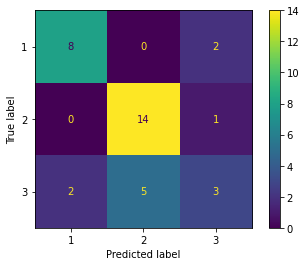

In [107]:
from sklearn.metrics import confusion_matrix
ypred= model.predict(x_val)
a= confusion_matrix(y_val,ypred)
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_val, ypred)

Calculo de parametros (Verdarero positivo, etc.)

In [108]:
#Para la clase 1
tp1= a[0,0]
tn1= a[1,1]+a[1,2]+a[2,1]+a[2,2]
fp1= a[0,1]+a[0,2]
fn1= a[1,0]+a[2,0]
#Para la clase 2
tp2= a[1,1]
tn2= a[0,0]+a[0,2]+a[2,0]+a[2,2]
fp2= a[1,0]+a[1,2]
fn2= a[0,1]+a[2,1]
#Para la clase 3
tp3= a[2,2]
tn3= a[0,0]+a[0,1]+a[1,0]+a[1,1]
fp3= a[2,0]+a[2,1]
fn3= a[0,2]+a[1,2]

Calculo de sesgos

0.8857142857142857 0.8285714285714286 0.7142857142857143


Text(0, 0.5, 'Excatitud')

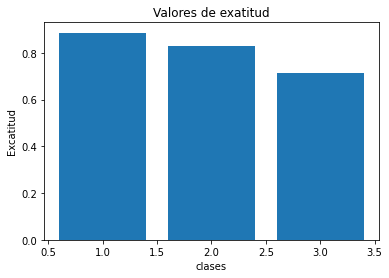

In [109]:
#Para la clase 1
acc1= (tp1+tn1)/(tp1+tn1+fp1+fn1)
#Para la clase 2
acc2= (tp2+tn2)/(tp2+tn2+fp2+fn2)
#Para la clase 3
acc3= (tp3+tn3)/(tp3+tn3+fp3+fn3)
print(acc1,acc2,acc3)
plt.bar([1,2,3],[acc1,acc2,acc3])
plt.title('Valores de exatitud')
plt.xlabel('clases')
plt.ylabel('Exactitud')

Calculo de varianza

0.8 0.9333333333333333 0.3


Text(0, 0.5, 'Precision')

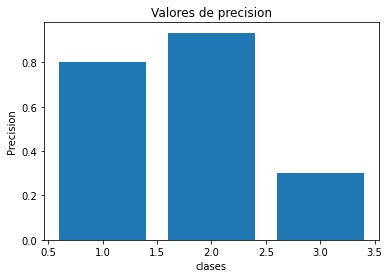

In [110]:
#Para la clase 1
pre1=tp1/(tp1+fp1)
#Para la clase 2
pre2= tp2/(tp2+fp2)
#Para la clase 3
pre3= tp3/(tp3+fp3)
print(pre1,pre2,pre3)
plt.bar([1,2,3],[pre1,pre2,pre3])
plt.title('Valores de precision')
plt.xlabel('clases')
plt.ylabel('Precision')

Modelo 2

In [123]:
columns= ["Class","Alcohol","Malic acid", "Ash","Alcalinity of ash", "Magnesium","Total phenols",
           "Flavanoids","Nonflavanoid phenols","Proanthocyanins","Color intensity","Hue",
           "OD280/OD315 of diluted wines","Proline"]
df2= pd.read_csv('wine.data',names= columns,index_col=False)
df2= df.sample(frac=1)
df2.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
164,3,13.78,2.76,2.30,22.0,90,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615
24,1,13.50,1.81,2.61,20.0,96,2.53,2.61,0.28,1.66,3.52,1.12,3.82,845
64,2,12.17,1.45,2.53,19.0,104,1.89,1.75,0.45,1.03,2.95,1.45,2.23,355
78,2,12.33,0.99,1.95,14.8,136,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750
135,3,12.60,2.46,2.20,18.5,94,1.62,0.66,0.63,0.94,7.10,0.73,1.58,695


In [124]:
df_x2= df.drop(['Class','OD280/OD315 of diluted wines','Proline'],axis=1)
df_y2= df['Class']
x_train2=df_x2.iloc[:107]
x_val2= df_x2.iloc[107:142]
x_test2= df_x2.iloc[142:]
y_train2=df_y2.iloc[:107]
y_val2= df_y2.iloc[107:142]
y_test2= df_y2.iloc[142:]

In [126]:
from sklearn.linear_model import LogisticRegression
model2= LogisticRegression(solver='newton-cg')
model2.fit(x_train2,y_train2)
scoretrain=model2.score(x_train2,y_train2)
scoretest=model2.score(x_test2,y_test2)
print('El score obtenido en los datos de entrenamiento es:',scoretrain,'\n')
print('El score obtenido en los datos de test es:',scoretest)

El score obtenido en los datos de entrenamiento es: 0.9719626168224299 

El score obtenido en los datos de test es: 0.9444444444444444


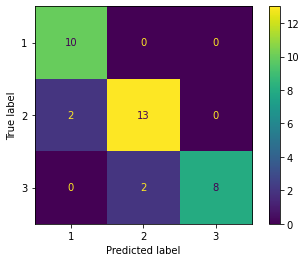

In [129]:
from sklearn.metrics import confusion_matrix
ypred2= model2.predict(x_val2)
a= confusion_matrix(y_val2,ypred2)
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_val2, ypred2)


In [130]:
#Para la clase 1
tp1= a[0,0]
tn1= a[1,1]+a[1,2]+a[2,1]+a[2,2]
fp1= a[0,1]+a[0,2]
fn1= a[1,0]+a[2,0]
#Para la clase 2
tp2= a[1,1]
tn2= a[0,0]+a[0,2]+a[2,0]+a[2,2]
fp2= a[1,0]+a[1,2]
fn2= a[0,1]+a[2,1]
#Para la clase 3
tp3= a[2,2]
tn3= a[0,0]+a[0,1]+a[1,0]+a[1,1]
fp3= a[2,0]+a[2,1]
fn3= a[0,2]+a[1,2]

0.9428571428571428 0.8857142857142857 0.9428571428571428


Text(0, 0.5, 'Exactitud')

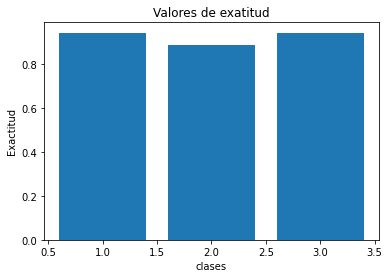

In [134]:
#Para la clase 1
acc1= (tp1+tn1)/(tp1+tn1+fp1+fn1)
#Para la clase 2
acc2= (tp2+tn2)/(tp2+tn2+fp2+fn2)
#Para la clase 3
acc3= (tp3+tn3)/(tp3+tn3+fp3+fn3)
print(acc1,acc2,acc3)
plt.bar([1,2,3],[acc1,acc2,acc3])
plt.title('Valores de exatitud')
plt.xlabel('clases')
plt.ylabel('Exactitud')

1.0 0.8666666666666667 0.8


Text(0, 0.5, 'Precision')

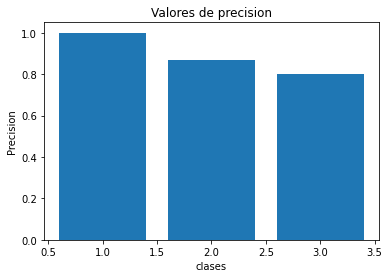

In [132]:
#Para la clase 1
pre1=tp1/(tp1+fp1)
#Para la clase 2
pre2= tp2/(tp2+fp2)
#Para la clase 3
pre3= tp3/(tp3+fp3)
print(pre1,pre2,pre3)
plt.bar([1,2,3],[pre1,pre2,pre3])
plt.title('Valores de precision')
plt.xlabel('clases')
plt.ylabel('Precision')

Nivel de ajuste del modelo

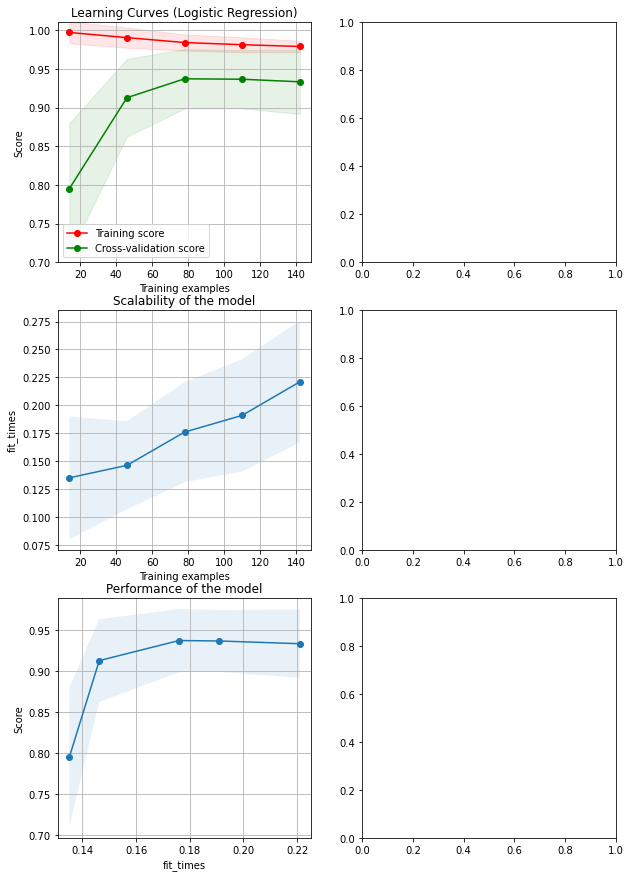

In [135]:
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    scoring=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    scoring : str or callable, default=None
        A str (see model evaluation documentation) or
        a scorer callable object / function with signature
        ``scorer(estimator, X, y)``.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        scoring=scoring,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 2, figsize=(10, 15))


title = "Learning Curves (Logistic Regression)"
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)

estimator = model2
plot_learning_curve(
    estimator,
    title,
    df_x2,
    df_y2,
    axes=axes[:, 0],
    ylim=(0.7, 1.01),
    cv=cv,
    n_jobs=4,
    scoring="accuracy",
)
plt.show()